In [175]:
# import the pandas module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
# Read the cleaned data from the cleaned dataset folder
# Setting the index_col=0 to avoid a unanmed index column
df = pd.read_csv('Cleaned_datasets/Step2.csv',index_col=0)

In [3]:
df.Destination.unique()

array(['Orlando/FL', 'Arlngtnhts/IL', 'Winterpark/FL', 'Incoming',
       'Caldwell/NJ', 'Melbourne/FL', 'Chicago/IL', 'Jacksonvl/FL',
       'VMRetrieval', 'Spartanbg/SC', 'Oviedo/FL', 'Clarksn/MI', '1-800',
       '1-844', 'Birmingham/AL', 'RepairSvc/FL', 'Ftlauderdl/FL', '1-855',
       'Miami/FL', 'Cocoa/FL', 'Phoenix/AZ', 'WPalmBch/FL',
       'Rockville/MD', 'Bernardsvl/NJ', 'Raleigh/NC', 'Tampa/FL',
       'SanJoseS/CA', 'BronxNyc/NY', 'Newark/NJ', 'Charlotte/NC',
       'Huntsville/TX', 'Granger/TX', 'Gainesvl/FL', 'RapidCity/SD',
       'Bellevue/WA', 'Wilmer/TX', 'Losangeles/CA', 'DialIt/XX',
       'CapstrVly/CA', 'Kissimmee/FL', '1-866', 'Jupiter/FL',
       'Nashville/TN', 'StCloud/FL', 'Bammel/TX', 'Sanford/FL',
       'Lincoln/CA', 'Deerfldbch/FL', 'Gloucester/VA', 'Hughesvl/MD',
       'Argyle/MN'], dtype=object)

In [4]:
df.head(10)

,DateNtime,Contact,Destination,Duration,Type
0,19-08-2021 21:13,(689) 837-5094,Orlando/FL,1,T-Mobile to T-Mobile
1,19-08-2021 21:02,(689) 837-5122,Orlando/FL,2,T-Mobile to T-Mobile
2,19-09-2021 19:49,(847) 630-7752,Arlngtnhts/IL,1,--
3,19-09-2021 12:42,(321) 316-1270,Winterpark/FL,2,T-Mobile to T-Mobile
4,19-09-2021 12:31,(408) 784-5390,Incoming,11,Call Waiting
5,18-09-2021 23:59,(407) 639-9772,Orlando/FL,1,T-Mobile to T-Mobile
6,18-09-2021 18:48,(321) 316-1270,Winterpark/FL,2,T-Mobile to T-Mobile
7,18-09-2021 18:47,(321) 316-1270,Incoming,1,T-Mobile to T-Mobile
8,18-09-2021 17:12,(407) 733-5867,Winterpark/FL,1,T-Mobile to T-Mobile
9,18-09-2021 17:05,(689) 837-5094,Incoming,1,T-Mobile to T-Mobile


In [31]:
# Now lets try to understand the number of unique contacts that I have converesed with
df.Contact.value_counts()

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3143   NaN
3144   NaN
3145   NaN
3146   NaN
3147   NaN
Name: counter, Length: 3148, dtype: float64

In [28]:
pd.Categorical(df.Contact,ordered=True).codes

array([113, 115, 133, ...,  83,  83,  47], dtype=int16)

In [29]:
df['Contact_codes']=pd.Categorical(df.Contact,ordered=True).codes

In [208]:
df=df.drop('counter',axis=1)

In [209]:
# Now we have the data in the required format for the visualization
df.head()

,DateNtime,Contact,Destination,Duration,Type,Contact_codes,year,month
0,19-08-2021 21:13,(689) 837-5094,Orlando/FL,1,T-Mobile to T-Mobile,113,2021,8
1,19-08-2021 21:02,(689) 837-5122,Orlando/FL,2,T-Mobile to T-Mobile,115,2021,8
2,19-09-2021 19:49,(847) 630-7752,Arlngtnhts/IL,1,--,133,2021,9
3,19-09-2021 12:42,(321) 316-1270,Winterpark/FL,2,T-Mobile to T-Mobile,18,2021,9
4,19-09-2021 12:31,(408) 784-5390,Incoming,11,Call Waiting,92,2021,9


In [213]:
# This gives us the contact codes of contacts with highest number of calls received or made
df.Contact_codes.value_counts(sort=True)[:5]

22     482
83     330
115    259
18     196
47     189
Name: Contact_codes, dtype: int64

C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Contact_codes', ylabel='Density'>

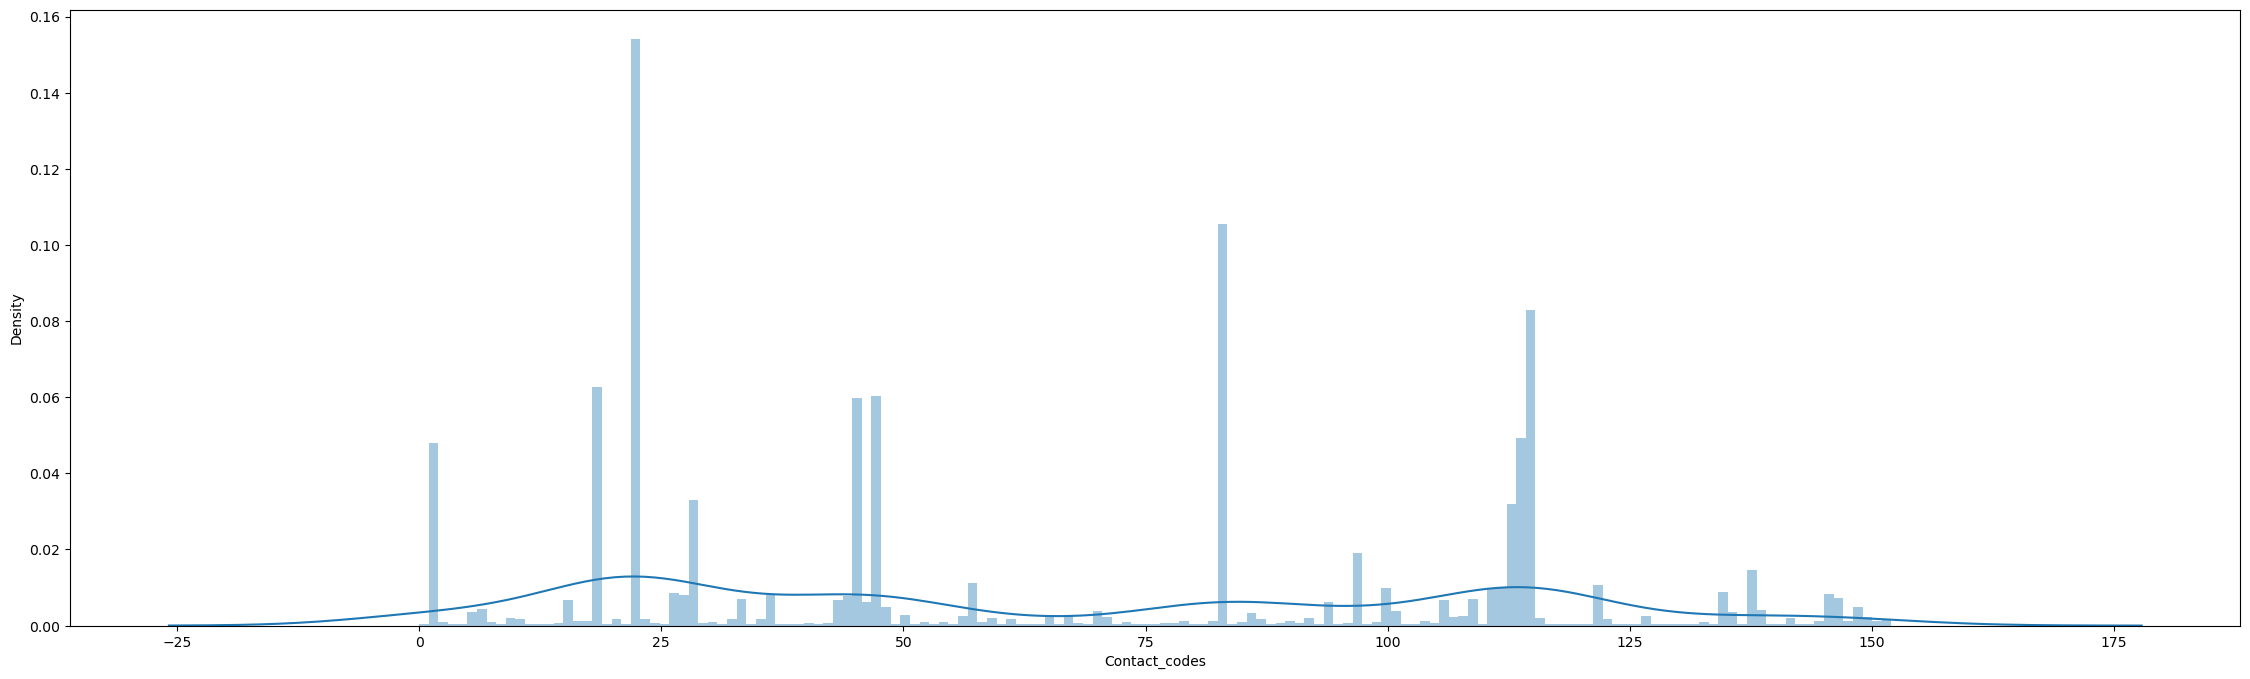

In [44]:
# Contact code makes it easier to plot of histogram for each of the contacts
fig1=plt.figure(figsize=(28,8),dpi=100)
sns.distplot(df['Contact_codes'],bins=153)

In [79]:
# Lets also try to extract the actual contact of the codes provided
df[['Contact','Contact_codes']][df.Contact_codes.isin([22,83,115,18,47])].value_counts()

Contact         Contact_codes
(321) 444-2758  22               482
(407) 881-1132  83               330
(689) 837-5122  115              259
(321) 316-1270  18               196
(407) 639-9772  47               189
dtype: int64

<AxesSubplot:xlabel='Contact_codes', ylabel='Duration'>

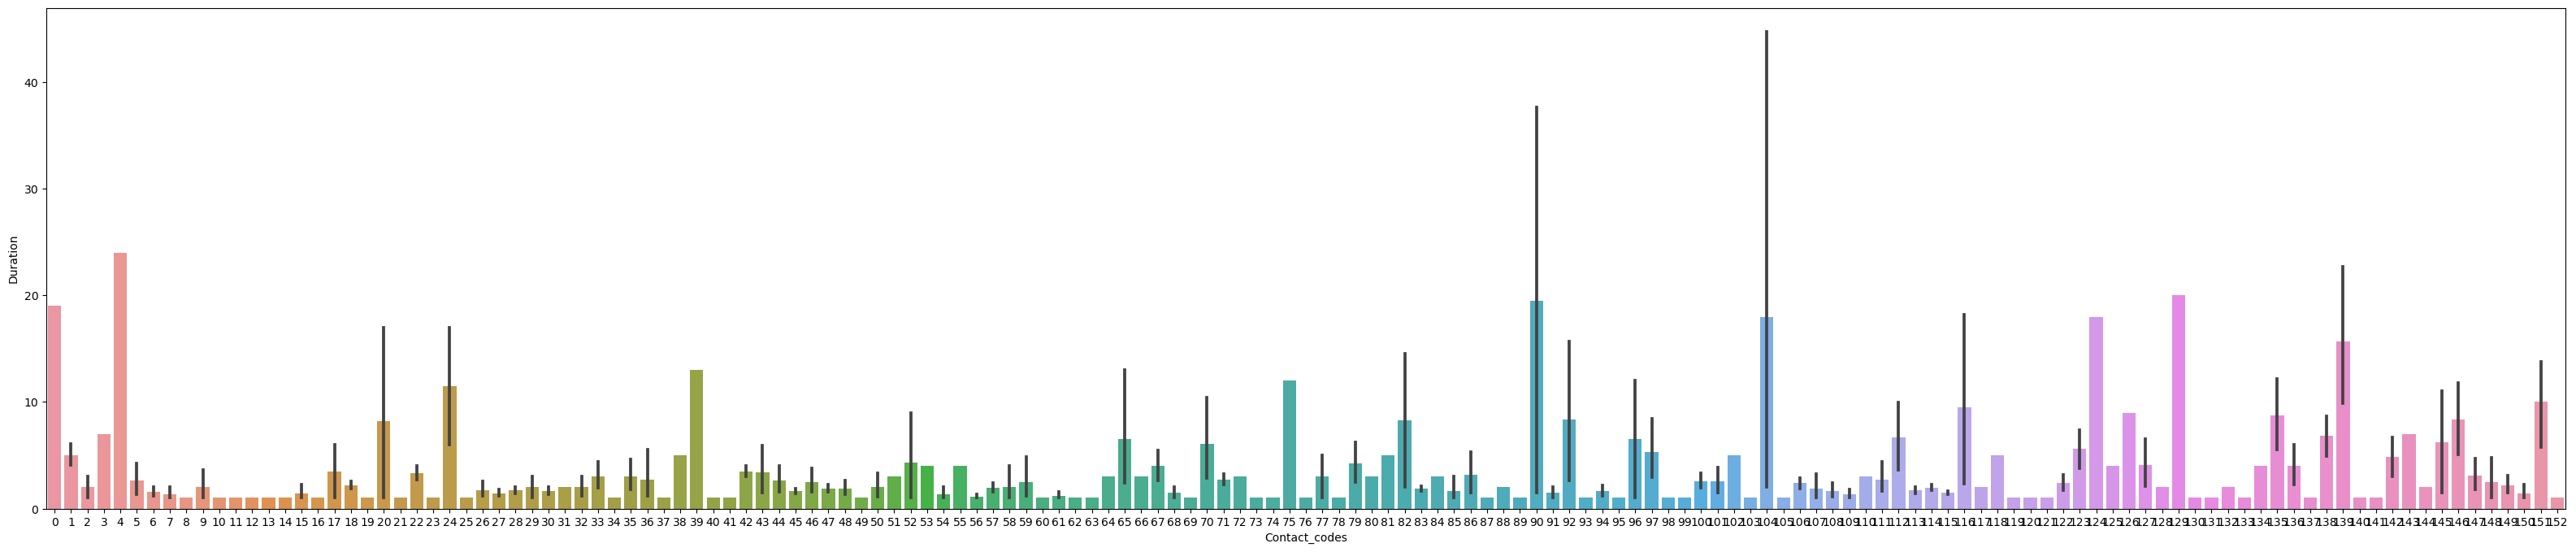

In [86]:
# Now that we know the contacts of the persons with whom the maximum conversation has been made
# lets try to find out the duration of the calls with these
fig1=plt.figure(figsize=(40,8),dpi=100)
sns.barplot(x='Contact_codes',y='Duration',data=df,estimator=np.mean)

In [120]:
# Validating the most frequent Communicators based on the total sum of duration
con_sum={}
for i in df.Contact_codes.sort_values().unique():
    con_sum[i]=df.Duration[df.Contact_codes==i].sum()

In [122]:
# From the results it is verfied that In the top 6, we have same contacts who were in the most frequent communicators list
sorted(con_sum.items(), key=lambda x:x[1])[-6:]

[(47, 352), (115, 391), (18, 426), (83, 627), (1, 749), (22, 1598)]

In [128]:
# Validating the most frequent Communicators based on the mean duration
con_mean={}
for i in df.Contact_codes.sort_values().unique():
    con_mean[i]=[df.Duration[df.Contact_codes==i].mean(),df.Duration[df.Contact_codes==i].count()]

In [131]:
# This gives us a very beautiful insight of the duration based on duration
# 1. Less frequent callers have a very mean as compared to the most frequent caller
# 2. Hence the most frequent callers were not present in the top 5 List when duration was sorted based on the mean of duration
sorted(con_mean.items(), key=lambda x:x[1][1])

[(0, [19.0, 1]),
 (3, [7.0, 1]),
 (4, [24.0, 1]),
 (8, [1.0, 1]),
 (11, [1.0, 1]),
 (12, [1.0, 1]),
 (13, [1.0, 1]),
 (19, [1.0, 1]),
 (21, [1.0, 1]),
 (25, [1.0, 1]),
 (31, [2.0, 1]),
 (34, [1.0, 1]),
 (37, [1.0, 1]),
 (38, [5.0, 1]),
 (39, [13.0, 1]),
 (41, [1.0, 1]),
 (49, [1.0, 1]),
 (51, [3.0, 1]),
 (53, [4.0, 1]),
 (55, [4.0, 1]),
 (60, [1.0, 1]),
 (62, [1.0, 1]),
 (63, [1.0, 1]),
 (64, [3.0, 1]),
 (66, [3.0, 1]),
 (69, [1.0, 1]),
 (72, [3.0, 1]),
 (74, [1.0, 1]),
 (75, [12.0, 1]),
 (76, [1.0, 1]),
 (80, [3.0, 1]),
 (81, [5.0, 1]),
 (84, [3.0, 1]),
 (88, [2.0, 1]),
 (93, [1.0, 1]),
 (95, [1.0, 1]),
 (98, [1.0, 1]),
 (102, [5.0, 1]),
 (103, [1.0, 1]),
 (110, [3.0, 1]),
 (117, [2.0, 1]),
 (118, [5.0, 1]),
 (119, [1.0, 1]),
 (120, [1.0, 1]),
 (121, [1.0, 1]),
 (124, [18.0, 1]),
 (125, [4.0, 1]),
 (126, [9.0, 1]),
 (128, [2.0, 1]),
 (129, [20.0, 1]),
 (130, [1.0, 1]),
 (131, [1.0, 1]),
 (132, [2.0, 1]),
 (134, [4.0, 1]),
 (137, [1.0, 1]),
 (140, [1.0, 1]),
 (141, [1.0, 1]),
 (143, [7

In [214]:
# Total time I have spoken to a contact code 22
# hence the below figure indicates the time accountable i.e.,1598 mins/26.63 hrs 
df.Duration[df.Contact_codes==22].sum()

1598

In [151]:
# When a duration is 1, it is usually a missed call or unattended call
# hence the below figure indicates the total duration accountable towards missed calls
df[['Contact_codes','Duration']].loc[df.Duration==1].loc[df.Contact_codes==22].count()

Contact_codes    331
Duration         331
dtype: int64

In [215]:
# Total duration without any missed calls 
df.Duration[df.Contact_codes==22].sum() - df['Duration'].loc[df.Duration==1].loc[df.Contact_codes==22].sum()

1267

In [155]:
# lets capture missed call duration for all the unique contacts
missed_calls={}
for i in df.Contact_codes.sort_values().unique():
    missed_calls[i]=[df['Duration'].loc[df.Duration==1].loc[df.Contact_codes==i].sum()]

In [164]:
# This gives us the total time accountable towards missed calls
sorted(missed_calls.items(), key=lambda x:x[1])[-6:]

[(18, [108]), (45, [121]), (47, [131]), (115, [179]), (83, [233]), (22, [331])]

In [162]:
# This gives us the pure time spent by the Contact 22 waiting for me to pick the call,which is 32
df['Duration'].loc[df.Duration==1].loc[df.Contact_codes==22].loc[df.Destination=='Incoming'].sum()

32

In [193]:
# datetimeIndex can be used to extract year month from the datetime values 
df['year']=pd.DatetimeIndex(df['DateNtime']).year

In [195]:
df['month']=pd.DatetimeIndex(df['DateNtime']).month

In [206]:
# Number of calls received in the month of Dec,2021
df.loc[df['month']==12].loc[df['year']==2021].loc[df['Destination']=='Incoming'].count()

DateNtime        42
Contact          42
Destination      42
Duration         42
Type             42
Contact_codes    42
counter           0
year             42
month            42
dtype: int64

In [204]:
# Number of calls made by me in Dec,2021
df.loc[df['month']==12].loc[df['year']==2021].count()-df.loc[df['month']==12].loc[df['year']==2021].loc[df['Destination']=='Incoming'].count()

DateNtime        77
Contact          77
Destination      77
Duration         77
Type             77
Contact_codes    77
counter           0
year             77
month            77
dtype: int64

In [ ]:
# Considering the above fact, a total of 119 calls were recorded in Dec,2021